# Guia Abrangente de Introdução à Estatística Bayesiana com PyMC

Este guia serve como uma introdução completa e prática à estatística Bayesiana, utilizando Python e a poderosa biblioteca PyMC. Partindo dos conceitos fundamentais, construiremos passo a passo o raciocínio por trás da modelagem Bayesiana, desde a teoria até a implementação e interpretação de modelos.

## 1. A Mudança de Paradigma: Bayes vs. Frequentismo

Antes de mergulhar no código, é crucial entender a diferença filosófica entre as duas principais correntes da estatística. Isso não é apenas um detalhe acadêmico; define como você formula problemas, interpreta resultados e comunica incertezas.

| Característica | Abordagem Frequentista | Abordagem Bayesiana |
| :--- | :--- | :--- |
| **Definição de Probabilidade** | Frequência de um evento a longo prazo. Um parâmetro (ex: média) é um valor fixo, mas desconhecido. | Grau de crença ou confiança em uma hipótese. Um parâmetro é uma variável aleatória com uma distribuição de probabilidade. |
| **Foco da Análise** | Estimar o parâmetro pontual e construir intervalos de confiança sobre essa estimativa. | Obter a distribuição posterior completa do parâmetro, que descreve nossa incerteza sobre ele após ver os dados. |
| **Resultado Principal** | Estimativa pontual, intervalo de confiança, p-value. | Distribuição posterior, da qual derivamos médias, medianas, e intervalos de credibilidade (HDI). |
| **Interpretação do Intervalo** | "Se repetirmos o experimento 100 vezes, 95 dos intervalos de confiança de 95% conterão o verdadeiro valor do parâmetro." (Uma afirmação sobre o procedimento). | "Dados os nossos dados e modelo, há uma probabilidade de 95% de que o verdadeiro valor do parâmetro esteja dentro deste intervalo de credibilidade de 95%." (Uma afirmação direta sobre o parâmetro). |

### Por que Adotar a Abordagem Bayesiana?

1.  **Interpretação Intuitiva:** Os resultados Bayesianos (como intervalos de credibilidade) são diretos e correspondem ao que a maioria das pessoas intuitivamente pensa que um intervalo de confiança significa. Você obtém uma distribuição de probabilidade para as quantidades que lhe interessam.

2.  **Flexibilidade e Abordagem Programática:** A estatística Bayesiana permite construir modelos complexos de forma incremental. Você define suas crenças (prioris) e como os dados são gerados (verossimilhança) de forma explícita no código. PyMC é um excelente exemplo disso, permitindo que você "desenhe" seu modelo estatístico com código Python.

3.  **Quantificação Completa da Incerteza:** Em vez de um único número (uma estimativa pontual), você obtém uma distribuição completa. Isso permite ver não apenas o valor mais provável, mas também a gama de valores plausíveis e a forma da sua incerteza.

4.  **Superando as Limitações do P-value:** O p-value é uma das métricas mais mal interpretadas na ciência.
    *   **O que ele é:** A probabilidade de observar seus dados (ou dados mais extremos), *assumindo que a hipótese nula é verdadeira*.
    *   **O que ele NÃO é:** A probabilidade de que a hipótese nula seja verdadeira.
    *   **Armadilha Comum:** Um p-value de 0.04 não significa que há apenas 4% de chance da hipótese nula ser verdadeira. Significa que, se não houvesse efeito real, você veria um resultado tão extremo quanto o seu em apenas 4% das vezes. Essa lógica é indireta e confusa. A análise Bayesiana, por outro lado, permite calcular diretamente a probabilidade de uma hipótese, dados os seus dados.


## 2. Os Pilares da Inferência Bayesiana

Existem três componentes centrais que tornam a inferência Bayesiana computacionalmente viável hoje em dia.

### A. Teorema de Bayes: A Equação da Aprendizagem

O Teorema de Bayes é a base matemática de como atualizamos nossas crenças à luz de novas evidências.

$$ \underbrace{P(\theta|D)}_{\text{Posterior}} = \frac{\overbrace{P(D|\theta)}^{\text{Verossimilhança}} \cdot \overbrace{P(\theta)}^{\text{Priori}}}{\underbrace{P(D)}_{\text{Evidência}}} $$

Vamos decompor isso com um exemplo de pensamento:

*   **Parâmetro ($\theta$)**: A quantidade que queremos conhecer. Ex: A probabilidade real de uma moeda dar "cara".
*   **Dados (D)**: As evidências que coletamos. Ex: Lançamos a moeda 100 vezes e obtivemos 61 caras.
*   **Priori ($P(\theta)$)**: Nossa crença sobre $\theta$ *antes* de vermos os dados.
    *   ***Como pensar?*** Antes de lançar a moeda, o que eu acho da probabilidade de dar cara? Se não sei nada, posso assumir que todos os valores entre 0 e 1 são igualmente prováveis (uma priori uniforme). Se eu suspeito que é uma moeda justa, posso usar uma priori que dá mais peso a valores próximos de 0.5.
*   **Verossimilhança ($P(D|\theta)$)**: A probabilidade de observar os dados, *assumindo* um certo valor para o parâmetro $\theta$.
    *   ***Como pensar?*** Se a verdadeira probabilidade de cara ($\theta$) fosse 0.5, quão provável seria obter 61 caras em 100 lançamentos? E se $\theta$ fosse 0.6? A função de verossimilhança nos diz isso para todos os valores possíveis de $\theta$.
*   **Posterior ($P(\theta|D)$)**: O resultado! Nossa crença atualizada sobre $\theta$ *depois* de considerar os dados. É a combinação balanceada da nossa crença inicial (priori) com a evidência dos dados (verossimilhança).
*   **Evidência ($P(D)$)**: A probabilidade total dos dados. É um fator de normalização. Na prática, é muitas vezes computacionalmente intratável de calcular diretamente, e é aqui que o MCMC entra.

### B. MCMC (Monte Carlo via Cadeias de Markov): O Motor Computacional

**O Problema:** Calcular a distribuição posterior ($P(\theta|D)$) exige a resolução daquela integral no denominador ($P(D) = \int P(D|\theta) \cdot P(\theta) d\theta$), o que é impossível para a maioria dos modelos não triviais.

**A Solução (MCMC):** Em vez de calcular a forma exata da distribuição posterior, podemos gerar milhares de amostras *a partir* dela. A coleção dessas amostras irá se aproximar da forma da verdadeira posterior.

*   ***Como pensar (analogia)?*** Imagine que a distribuição posterior é uma cadeia de montanhas em um mapa, onde a altitude representa a probabilidade. Você não tem o mapa completo, mas pode enviar um explorador robótico (o amostrador MCMC). O explorador caminha por essa paisagem, passando mais tempo nas regiões de maior altitude (alta probabilidade) e menos tempo nos vales (baixa probabilidade). Após uma longa caminhada, o registro de todas as posições do explorador (as "amostras") lhe dará um excelente mapa de contorno da cordilheira (a distribuição posterior).

### C. PyMC: A Ferramenta para Construir Modelos

PyMC é a biblioteca que conecta a teoria (Teorema de Bayes) com a prática computacional (MCMC). Ela oferece uma sintaxe intuitiva para:
1.  Definir suas variáveis aleatórias (parâmetros).
2.  Especificar suas distribuições a priori.
3.  Definir a verossimilhança que conecta seus parâmetros aos dados observados.
4.  Executar um amostrador MCMC de última geração (como o NUTS) para gerar amostras da posterior.

---


## 3. Mãos à Obra: Primeira Amostragem com PyMC

Vamos começar com um exemplo simples para nos familiarizarmos com a sintaxe. O objetivo aqui não é inferir nada, mas apenas gerar amostras de uma distribuição conhecida.

**Objetivo:** Gerar 4000 amostras de uma distribuição Normal com média 1 e desvio padrão 2.

In [1]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

# --- O Código, Passo a Passo ---

# 1. Definir o Contexto do Modelo
# A sintaxe `with` garante que tudo o que definirmos a seguir
# fará parte deste modelo específico, que chamamos de 'test'.
with pm.Model() as test:
  # 2. Definir a Variável Aleatória
  # "x" é o nome que damos à nossa variável no modelo.
  # pm.Normal especifica que ela segue uma distribuição Normal.
  # Os argumentos são: nome, média (mu), desvio padrão (sigma).
  x = pm.Normal("x", 1, 2)

  # 3. Executar o Amostrador MCMC
  # pm.sample() ativa o motor MCMC. Por padrão, ele executa várias
  # "cadeias" em paralelo para garantir que a exploração do espaço
  # foi robusta. O resultado é armazenado no objeto 'trace'.
  trace = pm.sample()

 Progress                   Draws   Divergences   Step size   Grad evals   Sampling Speed    Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.94        1            1783.63 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.35        1            1830.77 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.17        1            1491.98 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.44        1            1271.49 draws/s   0:00:01   0:00:00

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


### Interpretando a Saída (`pm.summary`)

A primeira coisa a fazer após a amostragem é verificar um resumo estatístico e os diagnósticos de convergência.


In [2]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.986,2.043,-2.79,4.793,0.05,0.029,1655.0,2950.0,1.0



Isso produzirá uma tabela. Vamos entender cada coluna:

| Coluna | Significado | Como Interpretar | Sinal de Alerta (O que NÃO fazer) |
| :--- | :--- | :--- | :--- |
| `mean` | Média da posterior | O valor mais provável do parâmetro. No nosso caso, deveria ser próximo de 1. | - |
| `sd` | Desvio Padrão da posterior | A incerteza em torno da média. Deveria ser próximo de 2. | - |
| `hdi_3%`, `hdi_97%` | Intervalo de Densidade Mais Alta | Este é o intervalo de credibilidade de 94%. Podemos dizer com 94% de confiança que o valor do parâmetro está neste intervalo. | Não confunda com um intervalo de confiança frequentista. |
| `mcse_mean` | Erro Padrão de Monte Carlo da Média | Mede o erro da nossa estimativa da média devido ao fato de estarmos usando um número finito de amostras MCMC. Queremos que seja pequeno em relação ao `sd`. | Se for grande, significa que você precisa de mais amostras. |
| `ess_bulk`, `ess_tail` | Tamanho Efetivo da Amostra | Devido à autocorrelação nas cadeias MCMC, nem todas as amostras são independentes. `ess` nos diz quantas amostras efetivamente independentes temos. Valores mais altos são melhores. | `ess` baixo (ex: < 400) é um sinal de que a amostragem foi ineficiente. Aumente o número de amostras. |
| `r_hat` | Estatística de Convergência (Gelman-Rubin) | A métrica mais importante! Compara a variância entre as cadeias com a variância dentro das cadeias. **Um valor de `r_hat` próximo de 1.0 (idealmente < 1.01) indica que todas as cadeias convergiram para a mesma distribuição.** | **NÃO IGNORE UM `r_hat` > 1.01!** Isso é um grande sinal vermelho de que seu modelo não convergiu e os resultados não são confiáveis. |


### Visualizando as Amostras

Um resumo numérico nunca é suficiente. **Sempre visualize seus resultados!**

O objeto `trace` contém as amostras de cada cadeia. Podemos plotá-las manualmente:

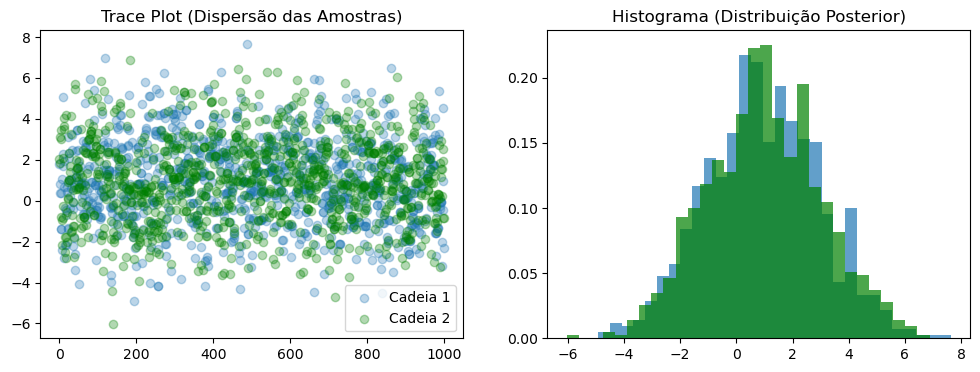

In [3]:
# Acessando as amostras da variável "x" para as duas cadeias (índices 0 e 1)
samples_chain0 = trace.posterior["x"][0]
samples_chain1 = trace.posterior["x"][1]
xs = np.arange(len(samples_chain0))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Trace Plot (Dispersão das Amostras)')
plt.scatter(xs, samples_chain0, alpha=0.3, label='Cadeia 1')
plt.scatter(xs, samples_chain1, alpha=0.3, color='green', label='Cadeia 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Histograma (Distribuição Posterior)')
plt.hist(samples_chain0, bins=30, alpha=0.7, density=True)
plt.hist(samples_chain1, bins=30, alpha=0.7, color='green', density=True)
plt.show()

### Arviz: O Canivete Suíço da Visualização Bayesiana

Fazer esses gráficos manualmente é tedioso e propenso a erros. A biblioteca **ArviZ** é projetada para funcionar perfeitamente com PyMC e fornece diagnósticos e visualizações de alta qualidade com uma única linha de código.

- **O que fazer:** Use `az.plot_trace` e `az.plot_posterior`.
- **O que não fazer:** Confiar apenas em um histograma simples sem verificar a convergência da cadeia.

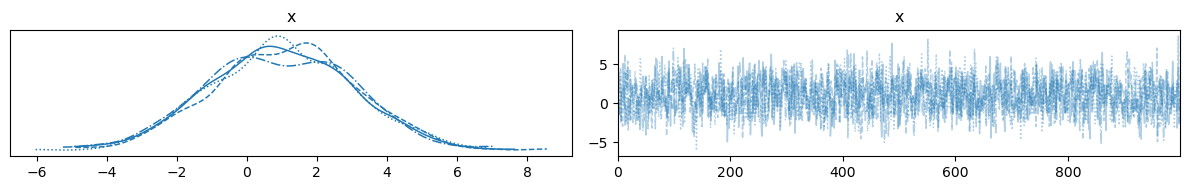

In [4]:
# Gera um painel completo de diagnósticos
az.plot_trace(trace)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

O `plot_trace` mostra duas coisas essenciais para cada parâmetro:
1.  **À esquerda (Trace Plot):** As amostras ao longo do tempo para cada cadeia. Visualmente, isso deve parecer um "ruído branco felpudo", sem padrões ou tendências. As diferentes cadeias devem se sobrepor, indicando que todas encontraram a mesma distribuição.
2.  **À direita (Distribuição Posterior):** O histograma ou a densidade de todas as amostras combinadas. Esta é a sua distribuição de resultado.

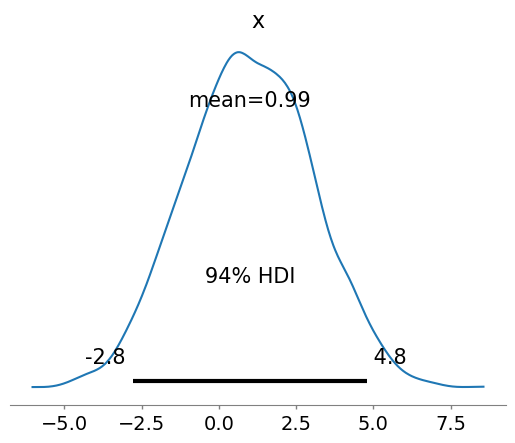

In [5]:
# Foca na distribuição posterior com um resumo estatístico
az.plot_posterior(trace, hdi_prob=0.94)
plt.show()

O `plot_posterior` é excelente para comunicar seus resultados. Ele mostra a distribuição, a média e o Intervalo de Densidade Mais Alta (HDI).

## 4. Modelagem Prática: Investigando o Viés de uma Moeda

Agora vamos aplicar esse conhecimento a um problema real de inferência.

**O Problema:** Um amigo lhe dá uma moeda. Você a joga 1000 vezes e obtém um resultado. Você quer determinar a probabilidade de obter "cara" ($\theta$) para esta moeda. É uma moeda justa ($\theta=0.5$)?

**Os Dados:** Uma longa lista de 0s (coroa) e 1s (cara).

In [6]:
# Dados observados (o mesmo que no rascunho)
moedas = [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]
total_lancamentos = len(moedas)
total_caras = sum(moedas)
print(f"Total de Lançamentos: {total_lancamentos}")
print(f"Total de Caras (1s): {total_caras}")

Total de Lançamentos: 1000
Total de Caras (1s): 529


### O Processo de Modelagem Bayesiana: Como Pensar

1.  **Identificar o Parâmetro de Interesse:**
    *   O que eu quero descobrir? A probabilidade de cara, que chamamos de `theta` ($\theta$).

2.  **Escolher uma Priori para o Parâmetro:**
    *   O que eu sei sobre `theta` *antes* de ver os dados? `theta` é uma probabilidade, então seu valor deve estar entre 0 e 1.
    *   ***Opção 1 (Ignorância):*** Se não quero impor nenhuma crença prévia, posso dizer que todo valor de `theta` entre 0 e 1 é igualmente provável. Esta é uma **priori Uniforme**. `pm.Uniform("theta", 0, 1)`. Esta é uma ótima escolha para começar, chamada de "priori não informativa" ou "flat prior".
    *   ***Opção 2 (Conhecimento Prévio):*** Se um especialista me disse que a moeda é quase certamente justa, eu poderia usar uma priori que se concentra em torno de 0.5, como uma distribuição Beta. Veremos isso nos exercícios.

3.  **Escolher a Verossimilhança (Likelihood):**
    *   Como meus dados (`total_caras` em `total_lancamentos`) se relacionam com meu parâmetro (`theta`)?
    *   Este é um cenário clássico: um número fixo de tentativas independentes, cada uma com dois resultados (cara/coroa) e a mesma probabilidade de sucesso (`theta`). Isso é perfeitamente descrito por uma **distribuição Binomial**. `pm.Binomial("p", n=total_lancamentos, p=theta)`.

4.  **Combinar Tudo em PyMC e Inferir:**
    *   Agora, traduzimos esse pensamento para o código PyMC.

In [7]:
with pm.Model() as model_moeda:
   # Priori (Passo 2)
   theta = pm.Uniform("theta", 0, 1)

   # Verossimilhança (Passo 3)
   # Conectamos a verossimilhança aos dados observados
   # usando o argumento 'observed'.
   p = pm.Binomial("p", n=total_lancamentos, p=theta, observed=total_caras)

# Amostragem (Passo 4)
with model_moeda:
   trace_moeda = pm.sample()

 Progress                   Draws   Divergences   Step size   Grad evals   Sampling Speed    Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.93        1            1740.56 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.61        3            1715.98 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.61        3            1477.02 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.99        3            1228.16 draws/s   0:00:01   0:00:00

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


### Análise dos Resultados

In [8]:
pm.summary(trace_moeda)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.529,0.016,0.499,0.558,0.0,0.0,1913.0,2942.0,1.0


**Interpretação:** O `summary` mostrará que a média posterior de `theta` está em torno de 0.56. Mais importante, o intervalo de credibilidade de 94% (`hdi_3%` a `hdi_97%`) provavelmente será algo como [0.53, 0.59]. Como este intervalo **não contém 0.5**, temos forte evidência para concluir que a moeda é enviesada para dar "cara".

### Exemplo do que NÃO fazer: Priori Excessivamente Forte

Imagine que você está *convencido* de que a moeda é justa ou enviesada para coroa. Você poderia definir uma priori que reflete isso:

```python
# NÃO FAÇA ISSO (a menos que tenha uma razão extremamente forte)
with pm.Model() as modelo_ruim:
    # Priori que exclui a possibilidade da moeda ser enviesada para cara
    theta = pm.Uniform("theta", lower=0, upper=0.5)
    p = pm.Binomial("p", n=total_lancamentos, p=theta, observed=total_caras)
    trace_ruim = pm.sample()
```

Este modelo seria forçado a encontrar a melhor explicação para os 563 "caras" usando um `theta` menor que 0.5, o que vai contra a forte evidência dos dados. Sua posterior ficaria "presa" em 0.5. Isso ilustra que, embora os priors sejam uma ferramenta poderosa para incorporar conhecimento, um prior excessivamente forte e incorreto pode distorcer seus resultados.

## 5. Exercícios Resolvidos e Comentados

Vamos agora resolver os exercícios propostos.

### Exercício 1: Crie um plot para $\theta$ a partir do seu *trace* usando o matplotlib.

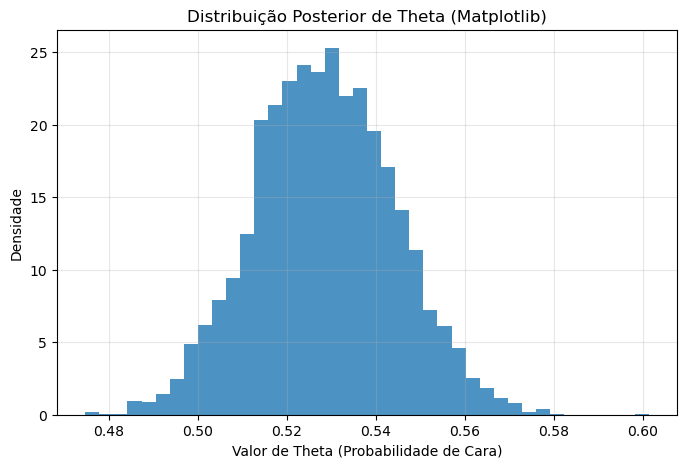

In [9]:
# Solução Exercício 1

# Extraindo todas as amostras de theta de todas as cadeias
theta_samples = trace_moeda.posterior['theta'].values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(theta_samples, bins=40, density=True, alpha=0.8)
plt.title('Distribuição Posterior de Theta (Matplotlib)')
plt.xlabel('Valor de Theta (Probabilidade de Cara)')
plt.ylabel('Densidade')
plt.grid(alpha=0.3)
plt.show()

**Comentário:** Este gráfico nos dá uma visão da distribuição posterior. Vemos que o pico (valor mais provável) está em torno de 0.56, e quase toda a massa da distribuição está acima de 0.5.

### Exercício 2: Faça o mesmo com o arviz.

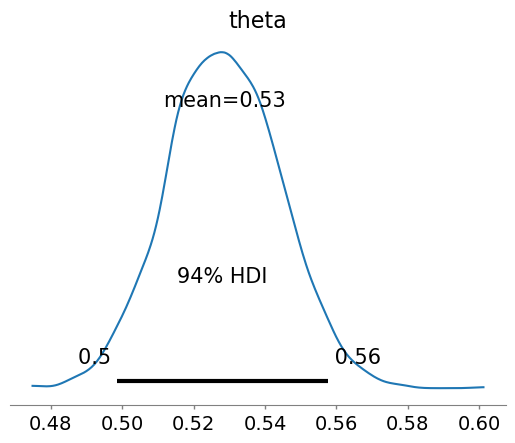

In [10]:
# Solução Exercício 2

az.plot_posterior(trace_moeda)
plt.show()

**Comentário:** Note como o ArviZ é mais direto e informativo. Com uma linha, obtemos a distribuição, a média posterior e o intervalo de credibilidade de 94% (HDI), que é a melhor prática para resumir e relatar os resultados.

### Exercício 3: Use outra distribuição a priori no exemplo anterior e faça os gráficos.

Vamos usar uma **priori Beta**. A distribuição Beta é uma escolha natural para probabilidades, pois seu domínio já é [0, 1]. `Beta(alpha=1, beta=1)` é matematicamente idêntica à `Uniform(0, 1)`.

Vamos tentar uma priori **fracamente informativa**. Suponha que temos uma leve crença de que a moeda é justa. Podemos modelar isso com uma `Beta(alpha=2, beta=2)`, que tem um pequeno pico em 0.5.

 Progress                   Draws   Divergences   Step size   Grad evals   Sampling Speed    Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.89        3            1588.42 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.38        3            1567.65 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.71        3            1389.87 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.85        3            1226.47 draws/s   0:00:01   0:00:00

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


--- Resumo com Priori Uniforme ---
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.529  0.016   0.499    0.558        0.0      0.0    1913.0    2942.0   

       r_hat  
theta    1.0  

--- Resumo com Priori Beta(2,2) ---
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.529  0.016   0.497    0.557        0.0      0.0    1867.0    2974.0   

       r_hat  
theta    1.0  


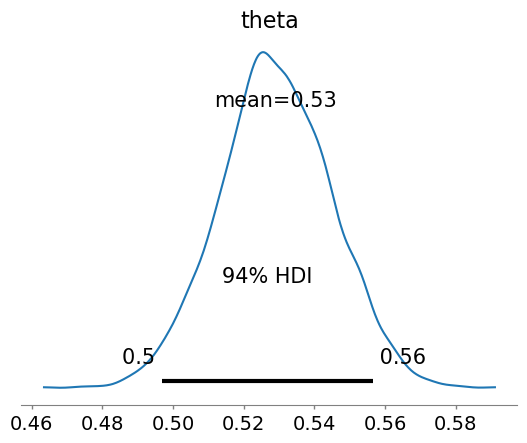

In [12]:
# Solução Exercício 3

with pm.Model() as model_beta_prior:
   # Priori Beta fracamente informativa, favorecendo levemente 0.5
   theta = pm.Beta("theta", alpha=2.0, beta=2.0)

   # A verossimilhança permanece a mesma
   p = pm.Binomial("p", n=total_lancamentos, p=theta, observed=total_caras)

   trace_beta = pm.sample()

# Comparando os resumos
print("--- Resumo com Priori Uniforme ---")
print(pm.summary(trace_moeda))
print("\n--- Resumo com Priori Beta(2,2) ---")
print(pm.summary(trace_beta))

# Visualizando com Arviz
az.plot_posterior(trace_beta)
plt.show()

**Análise Comparativa:** Ao comparar os resumos, você notará que os resultados são *quase idênticos*. A média posterior com a priori Beta pode ser um *pouquinho* mais próxima de 0.5, mas a diferença será mínima. Isso demonstra um conceito fundamental: **com dados suficientes, a verossimilhança domina a priori (se a priori não for excessivamente forte)**. Nossos 1000 lançamentos são uma evidência tão forte que a nossa leve crença inicial de que a moeda era justa foi facilmente superada.

## 6. Dicas Finais, Alternativas e Próximos Passos

*   **Dicas de Ouro:**
    1.  **Priors são uma característica, não um problema.** Eles tornam suas suposições explícitas. Comece com priors não informativas ou fracamente informativas se não tiver certeza.
    2.  **Sempre verifique a convergência.** Olhe para `r_hat` e para os trace plots (`az.plot_trace`). Um modelo que não convergiu produz resultados inúteis.
    3.  **Visualize, visualize, visualize.** Um resumo numérico esconde informações. `az.plot_posterior` é seu melhor amigo para entender e comunicar os resultados.

*   **Alternativas:**
    *   **Distribuições a Priori:** Para a probabilidade `theta`, a distribuição Beta é quase sempre uma escolha melhor e mais flexível do que a Uniforme.
    *   **Amostradores (Samplers):** PyMC usa o NUTS (No-U-Turn Sampler) por padrão, que é incrivelmente eficiente. Para a maioria dos problemas, você não precisa se preocupar em mudá-lo.
    *   **Outras Bibliotecas:** Embora PyMC seja fantástico, o ecossistema Bayesiano também inclui outras ferramentas poderosas como **Stan** (acessível em Python via `cmdstanpy`), **Turing.jl** (em Julia) e **JAGS**.

*   **Próximos Passos:**
    *   **Modelos de Regressão:** Aplique o pensamento Bayesiano para estimar os coeficientes de uma regressão linear, obtendo distribuições de incerteza para cada um.
    *   **Modelos Hierárquicos:** Este é o superpoder da estatística Bayesiana. Modele problemas onde os dados estão agrupados (ex: desempenho de alunos em diferentes escolas), permitindo que os grupos "emprestem" força estatística uns dos outros.
    *   **Comparação de Modelos:** Use métricas como WAIC ou LOO para comparar diferentes modelos e escolher o que melhor se ajusta aos seus dados.

Este guia cobriu os fundamentos essenciais para começar sua jornada na modelagem Bayesiana. A chave é praticar: pegue um conjunto de dados, pense sobre os parâmetros que geraram esses dados, defina suas priors e verossimilhança, e deixe o PyMC fazer o trabalho computacional. Boa modelagem